In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import yfinance as yf

In [2]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

In [3]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

In [4]:
companies = ["^AEX", "ASML.AS", "AIR","ING", "WKL.AS", "STLA", "AD.AS", "PHG", "^FVX","^TNX", "^TYX", "^VIX"]

combined_Data = []
for i in companies:
    asml1 = yf.Ticker(i)
    hist = asml1.history(period="max")

    #align dates
    stck = pd.DataFrame(hist['Close'])
    stck['newDate'] = stck.index
    stck.index = stck['newDate'].dt.strftime('%Y-%m-%d')
    stck.drop(columns=['newDate'], inplace=True)
    stck.columns = [i]

    combined_Data.append(stck)


In [5]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), combined_Data)
df_merged.index = pd.to_datetime(df_merged.index)
df_merged.tail()

,^AEX,ASML.AS,AIR,ING,WKL.AS,STLA,AD.AS,PHG,^FVX,^TNX,^TYX,^VIX
newDate,,,,,,,,,,,,
2024-12-11,896.140015,678.299988,67.370003,15.77,163.050003,13.83,32.080002,26.049999,4.134,4.271,4.479,13.58
2024-12-12,894.419983,683.299988,63.689999,15.28,162.199997,13.71,32.189999,25.629999,4.176,4.324,4.547,13.92
2024-12-13,893.549988,687.700012,63.220001,15.53,162.399994,13.95,32.340000,25.790001,4.248,4.399,4.615,13.81
2024-12-16,891.479980,688.000000,63.910000,15.52,163.899994,13.18,32.070000,25.660000,4.254,4.397,4.608,14.69
2024-12-17,889.289978,705.799988,NaN,NaN,163.300003,NaN,31.940001,NaN,4.284,4.421,4.611,15.09


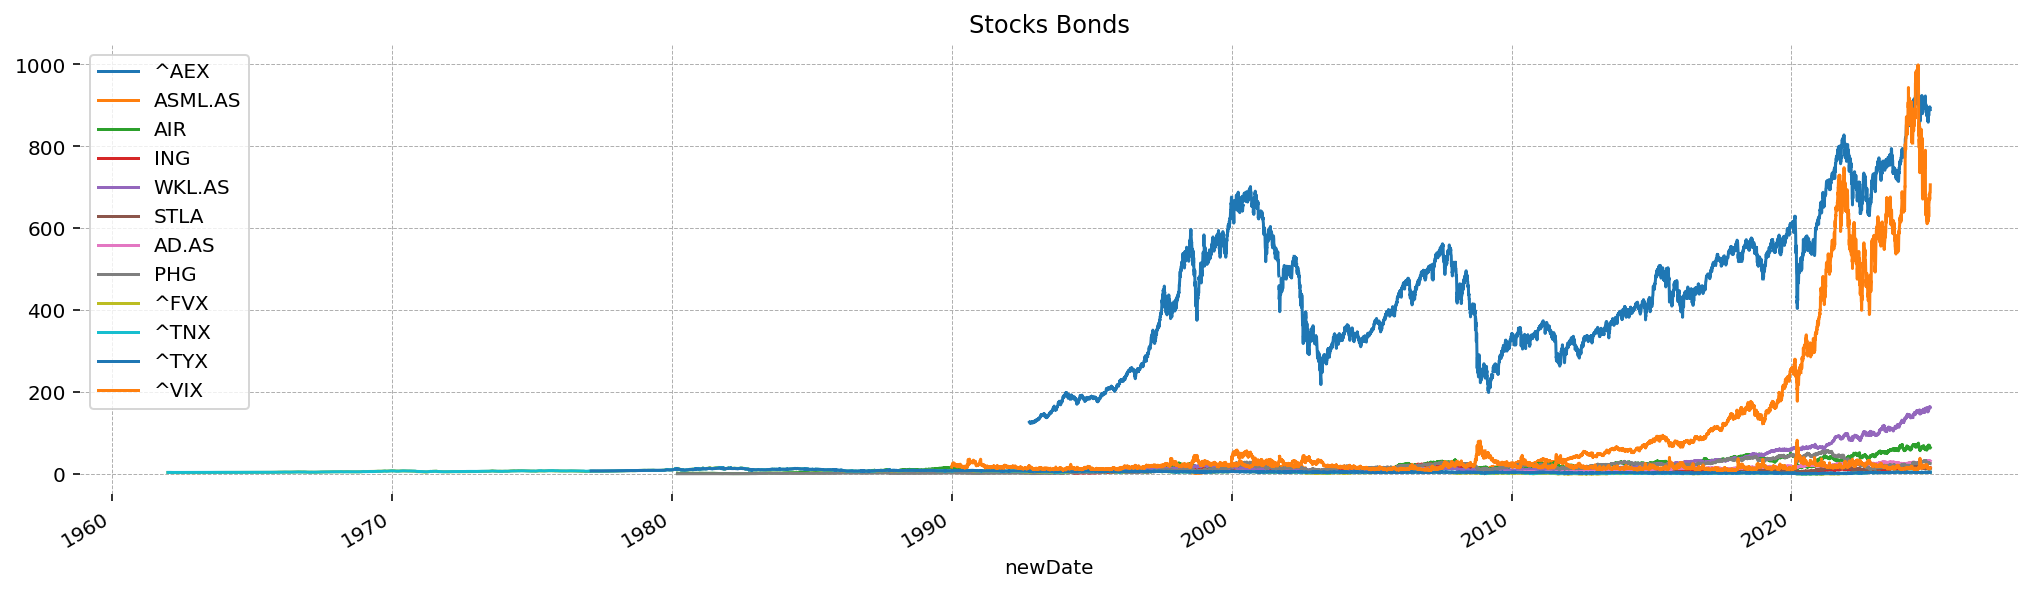

In [6]:

df_merged.plot(title='Stocks Bonds', grid=True);

In [7]:
aex_monthly = df_merged.resample('1MS').mean()
aex_monthly = aex_monthly.loc["1995-01-01":,]

aex_monthly.to_csv(output + "aex_stocks_bonds_mo.csv")